# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Imports

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md), [NumPy](http://www.numpy.org/), [Pandas](https://pandas.pydata.org/), and [Matplotlib](https://matplotlib.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import matplotlib.pyplot as plt
import pandas as pd
from dqn_agent import Agent

### 2. Instantiate the Environment and Agent and Explore the State and Action Spaces

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
# Load environment
env = UnityEnvironment(file_name="Banana.app")

# Get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# Reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# Number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# Examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

# Instantiate the DQN agent
agent = Agent(state_size, action_size, seed=0)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Train the Agent with DQN

In [3]:
def dqn(n_episodes=10000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, solution_score=13):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon

        # Print status updates
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))

        # Notify when environment is solved and save agent model parameters and score
        if np.mean(scores_window) >= solution_score:
            print("\nEnvironment solved in {} episodes".format(i_episode + 1))
            agent.save() # Save local model weights to solution.pth
            np.save('scores.npy', np.array(scores))
            break
    return scores

scores = dqn()



Episode 100	Average Score: 1.31
Episode 200	Average Score: 5.56
Episode 300	Average Score: 8.77
Episode 400	Average Score: 10.42
Episode 499	Average Score: 13.00
Environment solved in 500 episodes


### 4. Plot the Score

<IPython.core.display.Javascript object>


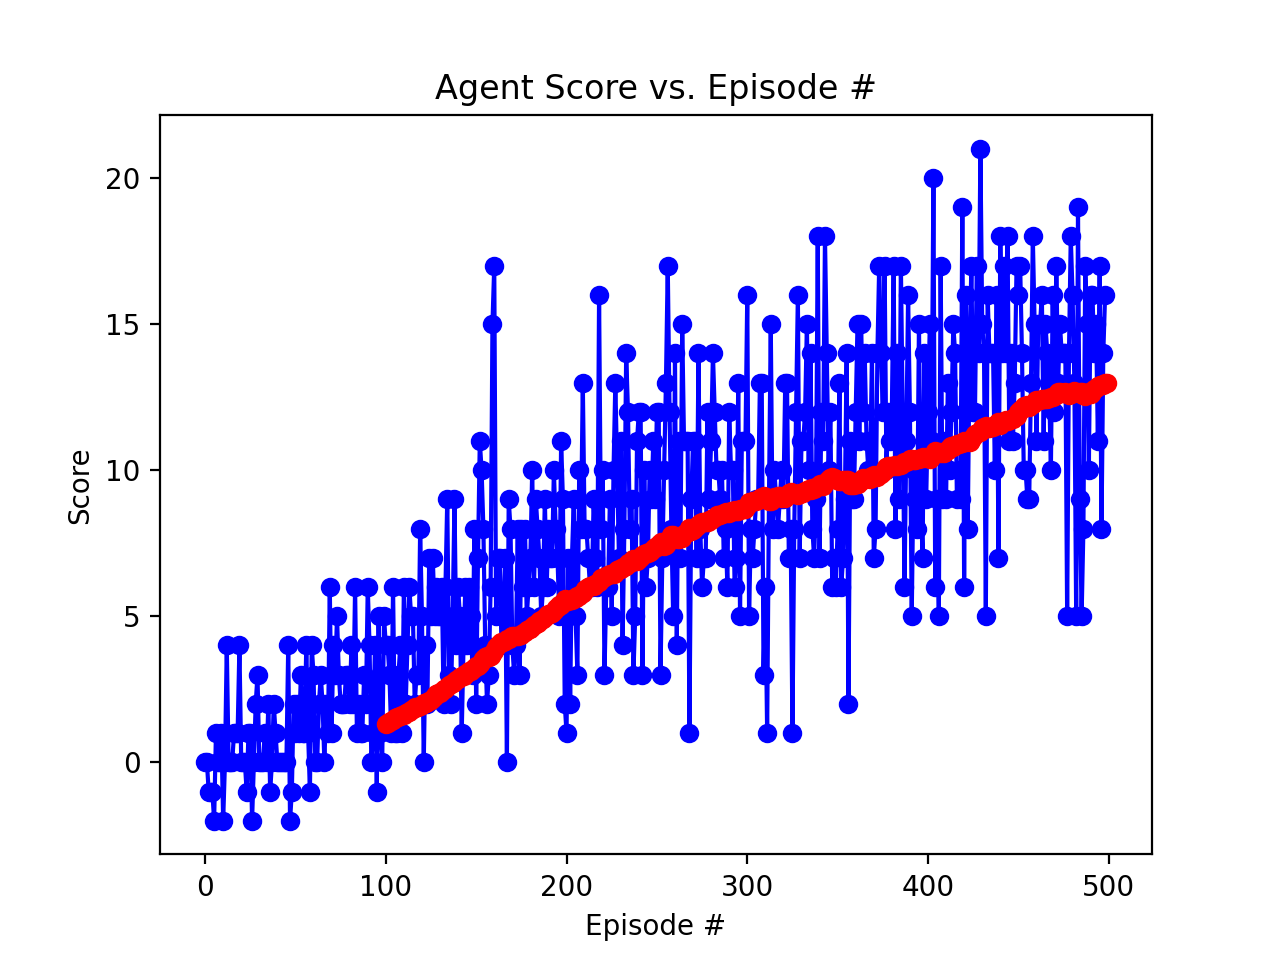

In [4]:
%matplotlib notebook

# Calculate running average of last 100 scores
scores_100 = pd.Series(scores).rolling(window=100).mean().iloc[99:].values  

fig = plt.figure()
plt.plot(scores, color='b', marker='o', label='All Scores')
plt.plot(np.arange(len(scores_100)) + 100, scores_100, color='r', marker='o', label='Average of Last 100 Scores')
plt.title('Agent Score vs. Episode #')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 5. Watch the Trained Agent

Load the trained weights from `solution.pth` to watch the trained agent

In [5]:
agent.load('solution.pth')  # load model weights into local network and copy them to target network

In [6]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
score = 0
state = env_info.vector_observations[0]
for j in range(100):
    action = agent.act(state)  # select an action
    env_info = env.step(action)[brain_name]  # send the action to the environment
    state = env_info.vector_observations[0]  # save the next state
    done = env_info.local_done[0]  # see if episode has finished
    if done:
        break 

### 6. Close environment 

In [7]:
env.close()
            